## Lab 2: Probability, Distributions, and Statistical Questions

#### Ciara West, PHYS 434A

In [1]:
import numpy as np
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)

## Problem 1

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).

A)

Show how the probability distribution of the background changes as you integrate (sum) for more days.

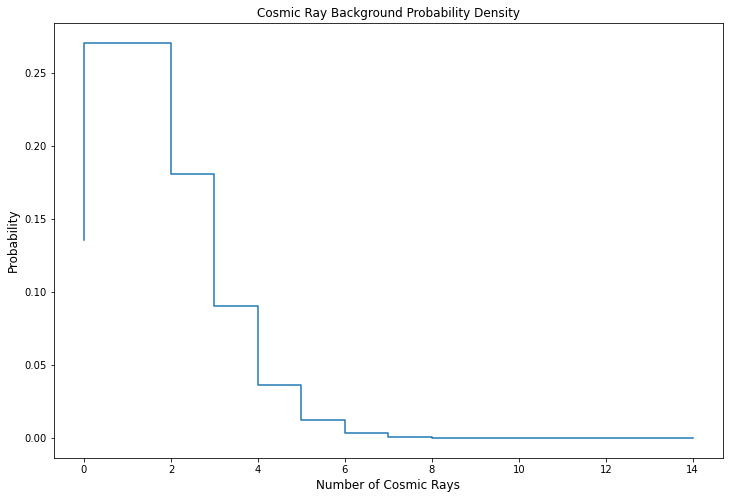

In [2]:
# average cosmic ray background
crb = 2
# average number of gamma rays
Y = 9

x_1=[]
avg_crb=[]
for i in range(0, 15):
    x_1.append(i)
    avg_crb.append(stats.poisson.pmf(i, crb))
plt.xlabel('Number of Cosmic Rays', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)    
plt.title('Cosmic Ray Background Probability Density', fontsize = 12)
plt.step(x_1, avg_crb)
plt.show()

In [3]:
def mult_conv(pdf, n):
    conv = np.convolve(pdf, pdf)
    for i in range(0, n-2):
        conv = np.convolve(conv, pdf)
    return(conv)

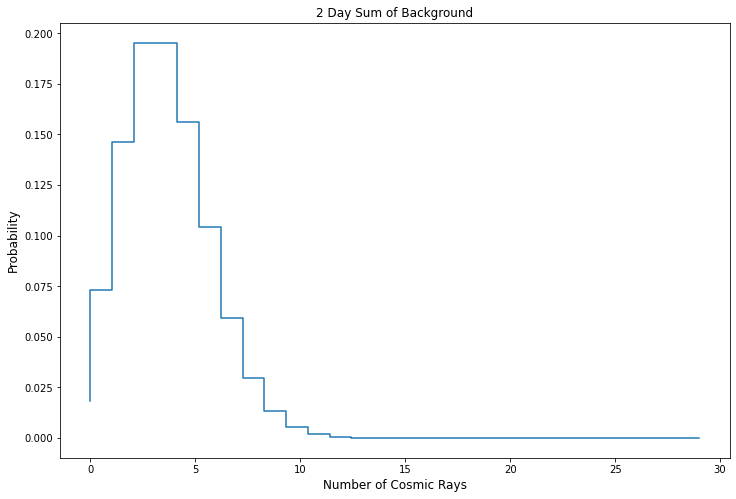

In [4]:
sum_bg = mult_conv(avg_crb, 1)
x_2 = np.linspace(0, len(sum_bg), len(sum_bg))
plt.step(x_2, sum_bg)
plt.title('2 Day Sum of Background')
plt.xlabel('Number of Cosmic Rays', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)  
plt.show()

The distribution has remained Poisson distributed, but as we sum over more days the peak appears to move away from zero. This is because a Poisson distribution is positive definite, so as we sum over more days peak must adjust to include the additional probabilities above zero. 

B) 

Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

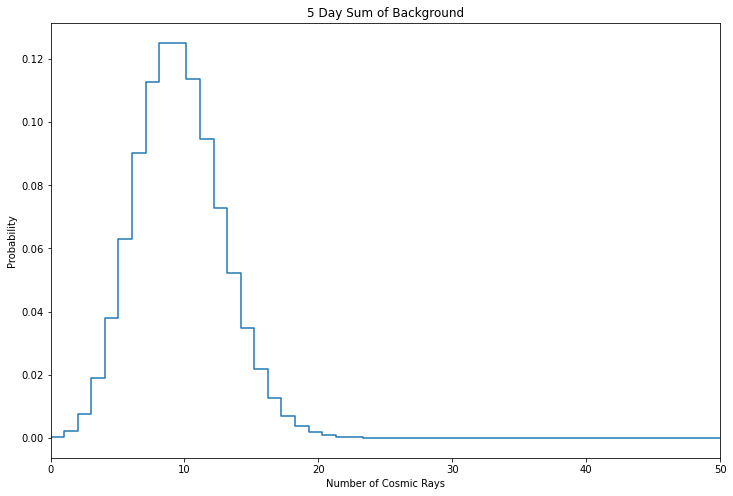

In [5]:
sum_5 = mult_conv(avg_crb, 5)
size = len(sum_5)
x_5 = np.linspace(0, size, size)
plt.step(x_5, sum_5)
plt.title('5 Day Sum of Background')
plt.xlabel('Number of Cosmic Rays')
plt.ylabel('Probability')  
plt.xlim([0, 50])
plt.show()   

The distribution after 5 days remains Poisson. This makes sense because 5 days still remains a small step size for the convolution integral, meaning the distribution is still closer to discrete than continuous. The right tail also appears to be skewed, which we will see on a semilog plot too. The central limit theorem states that most distributions will converge to a Gaussian pdf after enough trials, we just have not summed over enough days to see if we will reach a Gaussian yet. 

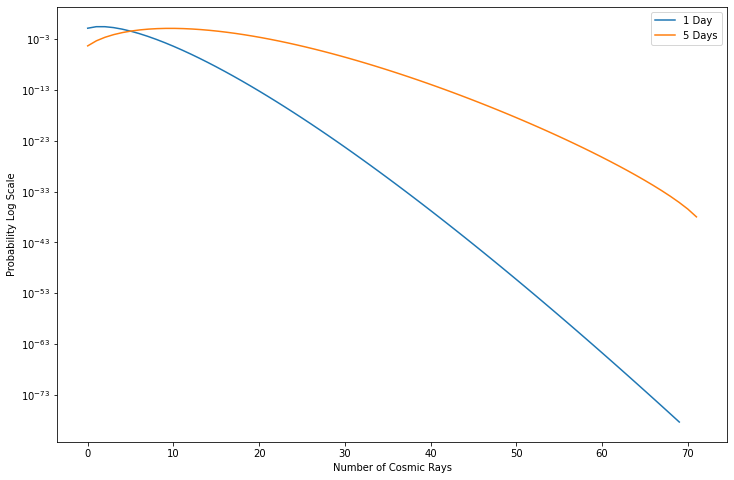

In [6]:
new_avg_crb=[]
new_x = []
for i in range(0, 70):
    new_x.append(i)
    new_avg_crb.append(stats.poisson.pmf(i, crb, loc = 0))
    
plt.semilogy(new_x, new_avg_crb, label = '1 Day')
plt.semilogy(np.linspace(0, len(sum_5), len(sum_5)), sum_5, label = '5 Days')
plt.xlabel('Number of Cosmic Rays')
plt.ylabel('Probability Log Scale')
plt.legend()
plt.show()

The semilog plot for 5 days compared to the original background is not much different. The original is a Poisson distribution, so we can see that the sum of 5 days has not changed the distribution much, only a little less skewed. 

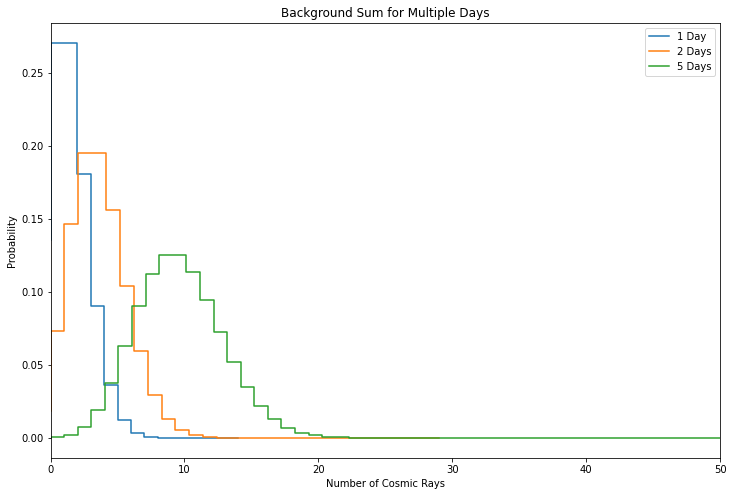

In [23]:
plt.step(x_1, avg_crb, label = f'1 Day')
plt.step(x_2, sum_bg, label = f'2 Days')
plt.step(x_5, sum_5, label = f'5 Days')
plt.legend()
plt.xlim([0, 50])
plt.title('Background Sum for Multiple Days')
plt.xlabel('Number of Cosmic Rays')
plt.ylabel('Probability')
plt.show()

C) 

Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

In [26]:
days = [8, 16, 30, 100, 1000]
sums = []
for i in range(len(days)):
    sums.append(mult_conv(avg_crb, days[i]))

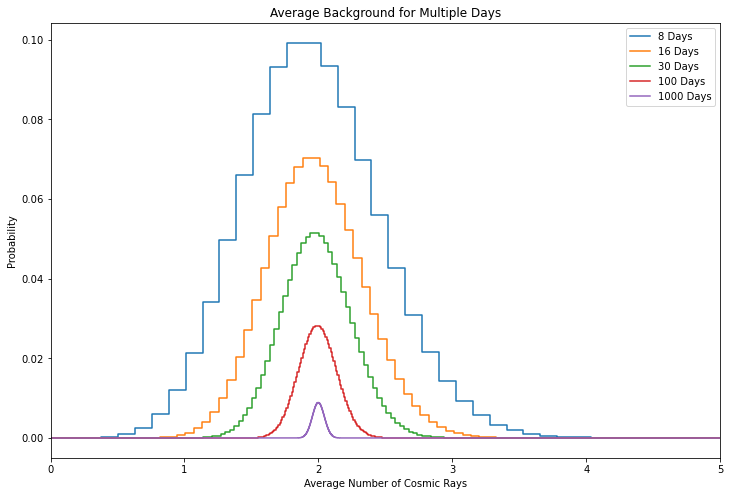

In [29]:
for i in range(len(sums)):
    plt.step(np.linspace(0, len(sums[i]), len(sums[i]))/days[i], sums[i], label = str(days[i]) + " Days")
plt.legend()
plt.title('Average Background for Multiple Days')
plt.xlabel('Average Number of Cosmic Rays')
plt.ylabel('Probability')
plt.xlim([0, 5])
plt.show()

As we approach the average of 100 days it is clear that the distribution has become smoother, and it appears to approach a gaussian shape. With 1000 days it appears much smoother than even the 100 day sum, meaning that we are approaching a more continuos rather than discrete distribution.  We will explore this more after plotting these averages on a semilog plot.

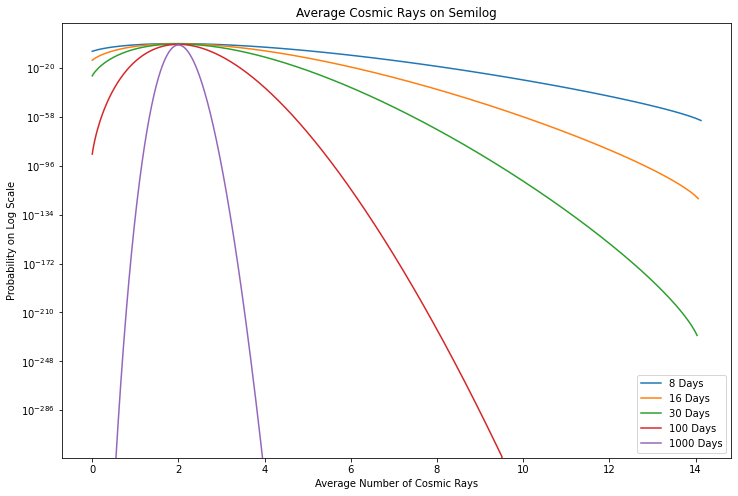

In [32]:
for i in range(len(sums)):
    plt.semilogy(np.linspace(0, len(sums[i]), len(sums[i]))/days[i], sums[i], label = str(days[i]) + " Days")
plt.legend()
plt.xlabel('Average Number of Cosmic Rays')
plt.ylabel('Probability on Log Scale')
plt.title('Average Cosmic Rays on Semilog')
plt.show()

If the averaged distribution were Gaussian we would expect a parabola shape on the semilog plot. When we average over 100 days the plot still appears skewed and not quite parabolic, meaning we have not quite reached a Gaussian distribution. The central limit theorem states that the sum of a distribution will eventually approach a Gaussian distribution, which we do see closer to 1000 days, but it still not a perfect parabola. Maybe 100,000 days would give us a Gaussian, but that uses a lot of memory for the computer to compute since it already takes some time to convolve 1000 days. 

D)

Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]

N = 2, Y = 9. After two days, what is the probability that I saw 18 gamma rays? 

In [11]:
# Integrate 2 day sum of background to obtain probability distribution
pdf = scipy.integrate.cumtrapz(sum_bg)
probability = pdf[18]
sigma = stats.norm.ppf(probability)
print('Probability of seeing 18 gamma rays after 2 days is: ', probability, ' which corresponds to a sigma of: ' , sigma)

Probability of seeing 18 gamma rays after 2 days is:  0.9908421428347561  which corresponds to a sigma of:  2.359173012722561


## Problem 2

Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.

A) 

Show how the Rayleigh distribution changes as you average over more observing intervals.

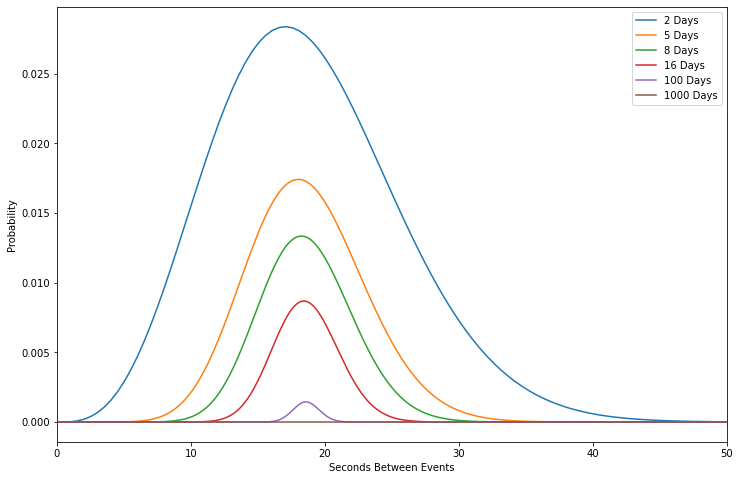

In [35]:
# Make a Rayleigh distribution
x = np.linspace(0, 100, 100)
bg = stats.rayleigh.pdf(x, scale = 15)

days = [2, 5, 8, 16, 100, 1000]
sums = []
for i in range(len(days)):
    sums.append(mult_conv(bg, days[i]))

for i in range(len(sums)):
    plt.plot(np.linspace(0, len(sums[i]), len(sums[i]))/days[i], sums[i], label = str(days[i]) + " Days")
plt.legend()
plt.xlabel('Seconds Between Events')
plt.ylabel('Probability')
plt.xlim([0, 50])
plt.show()

B)

Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

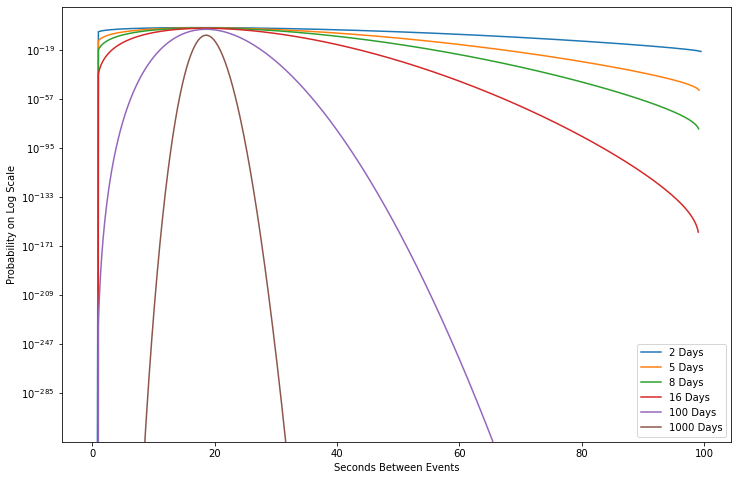

In [36]:
for i in range(len(sums)):
    plt.semilogy(np.linspace(0, len(sums[i]), len(sums[i]))/days[i], sums[i], label = str(days[i]) + " Days")
plt.legend()
plt.xlabel('Seconds Between Events')
plt.ylabel('Probability on Log Scale')
plt.show()

On a semilog plot, it appears again that at about 100 days the distribution approaches a parabolic shape. This means that it is approaching a Gaussian distribution, which follows the central limit theorem. By 1000 days it is clearly more parabolic and therefore more Gaussian than before. Same reasoning as problem 1 however, we could show a true parabola with more trials but that takes a lot of processing for the computer.

## Problem 3

Version 1 A) From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

What is the probability that the background gave me a signal as signal-like or more than the value I have?

This statistical question corresponds to the integral of the probability density function, in this case a normal distribution, from the signal value to infinity:

### Probability = $ \int_{15.5}^\infty ae^{-\frac{(x-\mu)^2}{2\sigma^2}}dx $ where $\mu$ = 0 and $\sigma$ = 3

In [38]:
# Gaussian with width 3, calculating probability above the signal value 15.5
width = 3
signal = 15.5
x = np.linspace(-15, 15, 1000)
background = stats.norm.pdf(x,loc = 0, scale =3)

probability = stats.norm.cdf(signal, loc = 0, scale = width)
sigma = stats.norm.ppf(probability)

print('The probability of getting a signal of 15.5 or higher is: ' , 1 - probability, ' which corresponds to a sigma of: ' , sigma)

The probability of getting a signal of 15.5 or higher is:  1.1915285336172587e-07  which corresponds to a sigma of:  5.1666666666014045


A sigma of 5 or higher is significant enough to claim a discovery. 

Version 2: You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.

B)

If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

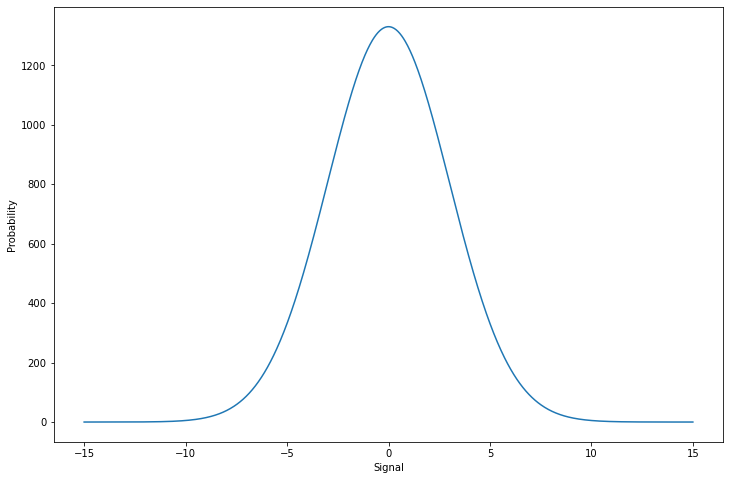

In [39]:
# Plot background of 10k pixels instead of 1 pixel
plt.plot(x, background*10000)
plt.xlabel('Signal')
plt.ylabel('Probability')
plt.show()

In order to approximate a 10,000 pixel background we can simply multiply the original normal distribution by 10,000, which basically scales the 1 pixel background by 10,000.

What is the expectation value of pixels given a certain signal strength? 

C)

Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

What is the probability of the background producing a signal of 15.5 or higher with a trials factor of 10k pixels? 

In [16]:
probability = (1 - stats.norm.cdf(15.5, loc = 0, scale = 3))*10000
sigma = stats.norm.ppf(1 - probability)
print('Sigma value for 10k pixels at 15.5 = ', sigma)

Sigma value for 10k pixels at 15.5 =  3.037808037534149


Sigma value of 3.03 is not considered significant enough for a discovery. 

## Problem 4

The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to se ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.

Let us again assume we have a Gaussian background (same parameters as Problem 3).

A) 

Calculate the signal required for a 5-sigma detection in Version 1

In [17]:
p_1 = stats.norm.cdf(5)
signal = stats.norm.ppf(p_1, scale=3)

print(f'In order to get a significant, 5 sigma, reading from 1 pixel we would need to measure {signal:.2f}')

In order to get a significant, 5 sigma, reading from 1 pixel we would need to measure 15.00


B)

Calculate the signal required for a 5-sigma detection in Version 2

In [18]:
p_10k = 1 - stats.norm.cdf(5)
signal_10k = stats.norm.ppf(1 - p_10k/10000, scale = 3)

print(f'In order to get a significant, 5 sigma, reading from 10000 pixels we would need to measure {signal_10k:.2f}')

In order to get a significant, 5 sigma, reading from 10000 pixels we would need to measure 19.65


C) 

Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

In [19]:
ratio = signal_10k/signal
print(f'The ratio of the signals for 10k pixels over 1 pixel is {ratio:.2f}')

The ratio of the signals for 10k pixels over 1 pixel is 1.31


With a trials factor of 10,000 the signal needs to be approximately 31% brighter to be significant enough for a discovery.  31% is not much higher for multiplying our our background by 10,000 but as we will see later the relationship does not appear to be linear or anything similar for larger and larger trials factors. 

D) 

If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

Starting with 10k, let's explore how the sensitivity changes with the trials factor:

In [20]:
p_5 = 1 - stats.norm.cdf(5)
trials = [10000, 100000, 1000000, 100000000]
trials_abbr = ['10k', '100k', '10 Million', '100 Million']
signal = 0
for i in range(len(trials)):
    signal = stats.norm.ppf(1 - p_5/trials[i], scale = 3)
    print('For trials factor of ' + trials_abbr[i] , f': {signal:.2f} for a 5 sigma signal')


For trials factor of 10k : 19.65 for a 5 sigma signal
For trials factor of 100k : 20.66 for a 5 sigma signal
For trials factor of 10 Million : 21.62 for a 5 sigma signal
For trials factor of 100 Million : 23.43 for a 5 sigma signal


Even as we approached 100 million trials, the sensitivty for a 5 sigma signal only changed by about 4, so the trials factor does not adjust the sensitivity very much even on scales of millions more trials. 

Extra credit: 

If you had a different distribution shape (non-Gaussian), how would that affect the sensitivity penalty of many trials? Clearly explain.

As a result of the central limit theorem, I would think that with a higher trials factor we would see similar trends to the Gaussian sensitivity penalty because we know that as we sum or average over enough trials the distribution will converge to a Gaussian. 